# 实验二

张天乐 计96 2018011038

## 上机题 2

### 实验内容

编程实现牛顿法与牛顿下山法求解下面两个方程. 要求: (1) 设定合适的迭代判停准则; (2) 设置合适
的下山因子序列; (3) 打印每个迭代步的近似解及下山因子; (4) 请用其他较准确的方法 (如MATLAB软件中的 fzero 函
数) 验证牛顿法与牛顿下山法结果的正确性。最后，总结哪个问题需要用牛顿下山法求解，及采用它之后的效果

### 实验过程

- 使用残差判据 + 误差判据
- 设定下山因子初值，每次迭代下山因子以一定比例减小
- 打印每个迭代步的近似解及下山因子
- 使用 python scipy 模块求根

In [83]:
import numpy as np

def newton(fun, derive, x0, damp=False):
    epsilon = 1e-6
    lamb = 0.9
    k = 0
    x = xk =x0
    while np.abs(fun(x)) > epsilon or np.abs(x - xk) > epsilon:
        s = fun(x) / derive(x)
        xk = x
        x = xk - s
        print('Step {:2d}: x = {:.6f}, f(x) = {:.6f}'.format(k, x, fun(x)))
        if not damp:
            if x == x0:
                print('[err] 牛顿法发生跳动, x 重复, 请更换初值')
                break
        else:
            i = 0
            lamb_i = lamb
            while np.abs(fun(x)) > np.abs(fun(xk)):
                x = xk - lamb_i * s
                lamb_i *= 0.9
                i += 1
                print('- lambda {:.5f}, x = {:.6f}, f(x) = {:.6f}'.format(lamb_i, x, fun(x)))
            if i > 0:
                print('         x = {:.6f}, f(x) = {:.6f}'.format(x, fun(x)))
        k += 1
    return x

对两个函数，分别使用牛顿法、牛顿下山法、scipy.optimize.root方法求根

In [84]:
from scipy.optimize import root

def test(fun, derive, x0):
    print('牛顿法')
    r1 = newton(fun, derive, x0)
    print('\n牛顿下山法')
    r2 = newton(fun, derive, x0, True)
    print('\nscipy.optimize.root 方法')
    r3 = root(fun, int(r2))
    print('Success: {}'.format(r3.success))
    print('\n牛顿法: {}, 牛顿下山法: {}, scipy.optimize.root 方法: {}'.format(r1, r2, r3.x[0]))
    
def f1(x):
    return x ** 3 - 2 * x + 2

def f1_derive(x):
    return 3 * x ** 2 - 2

def f2(x):
    return - x ** 3 + 5 * x

def f2_derive(x):
    return -3 * x ** 2 + 5

In [85]:
test(f1, f1_derive, 0)

牛顿法
Step  0: x = 1.000000, f(x) = 1.000000
Step  1: x = 0.000000, f(x) = 2.000000
[err] 牛顿法发生跳动, x 重复, 请更换初值

牛顿下山法
Step  0: x = 1.000000, f(x) = 1.000000
Step  1: x = 0.000000, f(x) = 2.000000
- lambda 0.81000, x = 0.100000, f(x) = 1.801000
- lambda 0.72900, x = 0.190000, f(x) = 1.626859
- lambda 0.65610, x = 0.271000, f(x) = 1.477903
- lambda 0.59049, x = 0.343900, f(x) = 1.352872
- lambda 0.53144, x = 0.409510, f(x) = 1.249654
- lambda 0.47830, x = 0.468559, f(x) = 1.165753
- lambda 0.43047, x = 0.521703, f(x) = 1.098588
- lambda 0.38742, x = 0.569533, f(x) = 1.045672
- lambda 0.34868, x = 0.612580, f(x) = 1.004714
- lambda 0.31381, x = 0.651322, f(x) = 0.973660
         x = 0.651322, f(x) = 0.973660
Step  2: x = 1.989979, f(x) = 5.900396
- lambda 0.81000, x = 1.856114, f(x) = 4.682378
- lambda 0.72900, x = 1.735634, f(x) = 3.757203
- lambda 0.65610, x = 1.627203, f(x) = 3.054086
- lambda 0.59049, x = 1.529615, f(x) = 2.519644
- lambda 0.53144, x = 1.441786, f(x) = 2.113535
- lambda

In [86]:
test(f2, f2_derive, 1.35)

牛顿法
Step  0: x = 10.525668, f(x) = -1113.507269
Step  1: x = 7.124287, f(x) = -325.975011
Step  2: x = 4.910781, f(x) = -93.873337
Step  3: x = 3.516911, f(x) = -25.914942
Step  4: x = 2.709743, f(x) = -6.348134
Step  5: x = 2.336940, f(x) = -1.078004
Step  6: x = 2.242244, f(x) = -0.062019
Step  7: x = 2.236093, f(x) = -0.000254
Step  8: x = 2.236068, f(x) = -0.000000
Step  9: x = 2.236068, f(x) = -0.000000

牛顿下山法
Step  0: x = 10.525668, f(x) = -1113.507269
- lambda 0.81000, x = 9.608102, f(x) = -838.937314
- lambda 0.72900, x = 8.782291, f(x) = -633.454764
- lambda 0.65610, x = 8.039062, f(x) = -479.341330
- lambda 0.59049, x = 7.370156, f(x) = -363.490205
- lambda 0.53144, x = 6.768140, f(x) = -276.192417
- lambda 0.47830, x = 6.226326, f(x) = -210.245240
- lambda 0.43047, x = 5.738694, f(x) = -160.296674
- lambda 0.38742, x = 5.299824, f(x) = -122.363080
- lambda 0.34868, x = 4.904842, f(x) = -93.473901
- lambda 0.31381, x = 4.549358, f(x) = -71.409704
- lambda 0.28243, x = 4.22942

### 实验结论

函数 (1) 的牛顿法失败，迭代解在 0, 1 之间跳转。牛顿下山法迭代 13 步，解为 -1.7692923542386314。scipy.optimize.root 解为 -1.7692923542386312。

函数 (2) 的牛顿法迭代 9 步， 解为2.23606797749979。牛顿下山法迭代 4 步，解为 2.2360679774998133。scipy.optimize.root 解为 2.2360679774997894。

可以看出牛顿法存在问题：局部收敛, 依赖于初始解的设定，存在不收敛的情况。牛顿下山法使用一系列下山因子，保证 $|f(x_{k+1})| < |f(x_k)|$ ，在一定程度上防止牛顿法迭代过程发散。

## 上机题 3


### 实验内容

利用 2.6.3 节给出的 fzerotx 程序，编程求第一类的零阶贝塞尔函数 $J_0(x)$ 的零点。试求 $J_0(x)$ 的前10个正的零点, 并绘出函数曲线和零点的位置

### 实验过程

In [87]:
def fzerotx(func, a, b, eps):
	fa, fb = func(a), func(b)
	if np.sign(fa) == np.sign(fb):
		print('Function must change sign on the interval')
		return

	c = a
	fc = fa
	d = b - c
	e = d

	while fb != 0:
		if np.sign(fa) == np.sign(fb):
			a, fa = c, fc
			d = b - c
			e = d

		if abs(fa) < abs(fb):
			c, fc = b, fb
			b, fb = a, fa
			a, fa = c, fc

		m = 0.5 * (a - b)
		tol = 2 * eps * max(abs(b), 1)

		if abs(m) <= tol or fb == 0:	# 收敛测试
			break

		if abs(e) < tol or abs(fc) <= abs(fb):	# 二分法
			d = e = m
		else:
			s = fb / fc
			if a == c:	# 割线法
				p = 2 * m * s
				q = 1 - s
			else:	# 逆二次插值
				q = fc / fa
				r = fb / fa
				p = s * (2 * m * q * (q - r) - (b - c) * (r - 1))
				q = (q - 1) * (r - 1) * (s - 1)

			if p > 0:
				q = -q
			else:
				p = -p

			if 2 * p < 3 * m * q - abs(tol * q) and p < abs(0.5 * e * q):
				e = d	# 判断逆二次插值 / 割线法的结果是否可接受
				d = p / q
			else:
				d = e = m

		c = b	# 准备下一个迭代步
		fc = fb
		if abs(d) > tol:
			b = b + d
		else:
			b = b - np.sign(b - a) * tol
		fb = func(b)
	return b

绘制 $J_0(x)$ 曲线，估算 $J_0(x)$ 的前10个正的零点区间

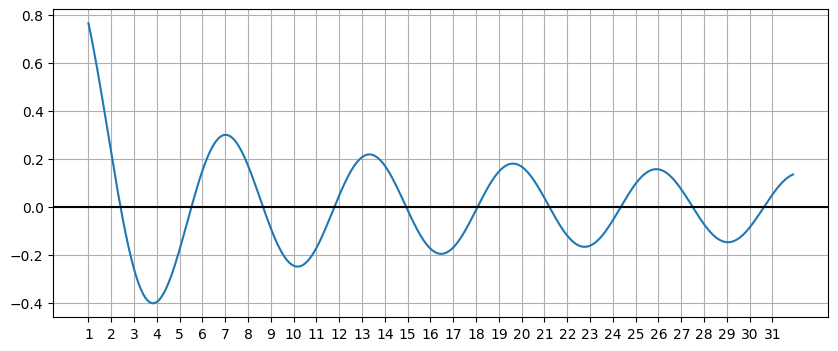

In [88]:
import matplotlib.pyplot as plt
from scipy.special import j0

x = np.arange(1, 32, 0.1)
y = j0(x)

plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.plot(x, y)
plt.grid(True)
plt.xticks(np.arange(1, 32, 1))
plt.axhline(0, color='black')
plt.show()

 $J_0(x)$ 的前10个正的零点区间为

In [89]:
intervals = [
    (2, 3),
    (5, 6),
    (8, 9),
    (11, 12),
    (14, 15),
    (17, 19),
    (21, 22),
    (24, 25),
    (27, 28),
    (30, 31),
]

In [90]:
result = []

for interval in intervals:
    result.append(fzerotx(j0, *interval, 1e-8))

print(result)

[2.404825568995971, 5.5200781104384005, 8.653727917682568, 11.79153449631245, 14.930917714231663, 18.071063996037388, 21.21163665052287, 24.352471608227958, 27.493479147827202, 30.63460648844871]


使用 fzeroin 计算零点并绘制图像

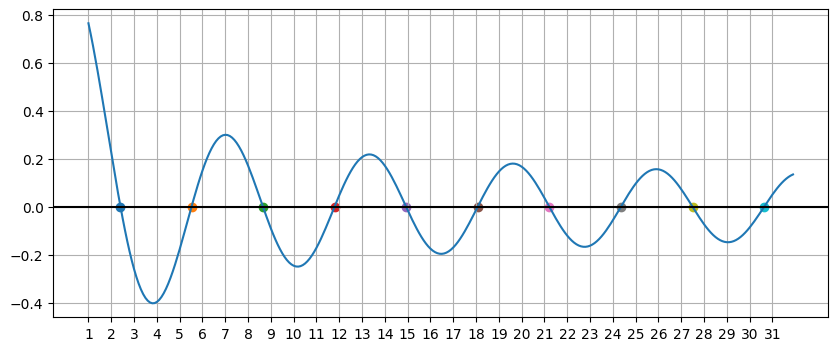

In [94]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.plot(x, y)
plt.grid(True)
plt.xticks(np.arange(1, 32, 1))
plt.axhline(0, color='black')
for zero in result:
    plt.scatter(zero, 0)
plt.show()